In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split

#Load csv
df_games = pd.read_csv("partidos_cebollitas_9eada58c-fb57-4224-a3f5-6d9efc881c2e.csv")
#Creation objective variable
df_games['diferencia_goles'] = df_games['goles_local'] - df_games['goles_visitante']

#Predict variables
X = df_games[['posesion_local (%)','tiros_arco_local']]
y = df_games['diferencia_goles']

# split data : 80% train , 20%test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2  , random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
#Instance and model train
model_rl = LinearRegression()
model_rl.fit(X_train , y_train)

print("Model Succesful train")

Model Succesful train


In [12]:
#Show coeficients
print(f"Intercept (Bo): {model_rl.intercept_}")
print(f"Coeficient (B): {model_rl.coef_}")

#Friendly interpretation
for idx , col_name in enumerate(X.columns):
    print(f"If we add 1 unit in '{col_name}' , goals difference change in avg {model_rl.coef_[idx]:.2f}")

Intercept (Bo): -2.525719257232977
Coeficient (B): [ 0.05596278 -0.05125811]
If we add 1 unit in 'posesion_local (%)' , goals difference change in avg 0.06
If we add 1 unit in 'tiros_arco_local' , goals difference change in avg -0.05


In [15]:
#Make predictions
y_pred = model_rl.predict(X_test)

#Comparation predict vs real values
df_results = X_test.copy()
df_results['Diference_Goles_real'] = y_test
df_results['Diference_Goles_predicts'] = y_pred.round(2)
df_results.head(10)

,posesion_local (%),tiros_arco_local,Diference_Goles_real,Diference_Goles_predicts
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


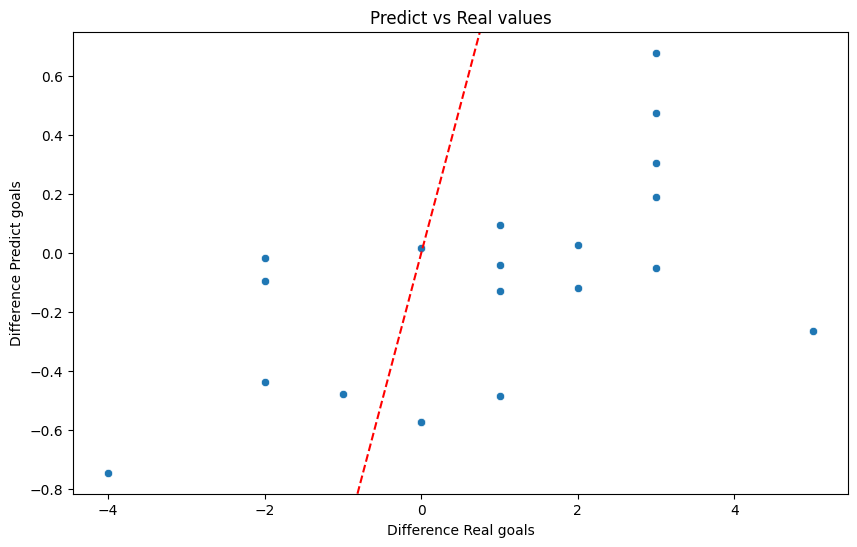

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creating plots 
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test , y=y_pred)
plt.xlabel('Difference Real goals')
plt.ylabel('Difference Predict goals')
plt.title('Predict vs Real values')
plt.axline((0,0), slope=1, color='red' , linestyle='--')
plt.show()

In [28]:
import ipywidgets as widgets

#Entry widgets
posesion_input = widgets.FloatSlider(min=30,max=70,step=1,description='Posesion (%)')
tiros_input = widgets.IntSlider(min=1,max=15,step=1,description='Shots Meta')

#Function to predict
def predict_goals(posesion, shots):
    #Create Dataframe wirh names of rows expected by model
    input = pd.DataFrame([[posesion,shots]] , columns=['posesion_local (%)','tiros_arco_local'])
    pred = model_rl.predict(input)[0]
    print(f"Difference goals predict: {pred:.2f}")
    
#Show widgets intereactive
widgets.interactive(predict_goals,posesion=posesion_input , shots = tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesion (%)', max=70.0, min=30.0, step=1.0), IntSl…